<a href="https://colab.research.google.com/github/stephenfrein/fultonlearning/blob/main/TreeModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
### SET UP SPARK ENVIRONMENT ###

!apt-get update # Update apt-get repository.
!apt-get install openjdk-8-jdk-headless -qq > /dev/null # Install Java.
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz # Download Apache Spark
!tar xf spark-3.1.1-bin-hadoop3.2.tgz # Unzip the tgz file.
!pip install -q findspark # Install findspark. Adds PySpark to the System path during runtime.

# Set environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

!ls

# Initialize findspark
import findspark
findspark.init()

# Create a PySpark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,160 kB]
Fetched 2,417 kB in 5s (478 kB/s)
Reading package lists... Done
sample_data		   spark-3.1.1-bin-hadoop3.2.tgz
spark-3.1.1-bin-hadoop3.2  spark-3.1.1-bin-hadoop3.2

In [14]:
!wget --no-check-certificate "https://drive.google.com/uc?export=download&id=1T5419ivX6B3GVVMf3O-SCtFn5GohkSHW" -O bankmarketing.csv
!ls -la

--2024-06-06 19:47:25--  https://drive.google.com/uc?export=download&id=1T5419ivX6B3GVVMf3O-SCtFn5GohkSHW
Resolving drive.google.com (drive.google.com)... 142.250.107.113, 142.250.107.100, 142.250.107.139, ...
Connecting to drive.google.com (drive.google.com)|142.250.107.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1T5419ivX6B3GVVMf3O-SCtFn5GohkSHW&export=download [following]
--2024-06-06 19:47:25--  https://drive.usercontent.google.com/download?id=1T5419ivX6B3GVVMf3O-SCtFn5GohkSHW&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.202.132, 2607:f8b0:400e:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.202.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3751499 (3.6M) [application/octet-stream]
Saving to: ‘bankmarketing.csv’

bankmarketing.csv   100%[===================>]   3.58M 

In [12]:
ls -la

total 450416
drwxr-xr-x  1 root root      4096 Jun  6 19:46  ./
drwxr-xr-x  1 root root      4096 Jun  6 19:15  ../
drwxr-xr-x  4 root root      4096 Jun  5 13:29  .config/
-rw-r--r--  1 root root         0 Jun  6 19:41  myfile
drwxr-xr-x  1 root root      4096 Jun  5 13:35  sample_data/
drwxr-xr-x 13 1000 1000      4096 Feb 22  2021  spark-3.1.1-bin-hadoop3.2/
-rw-r--r--  1 root root 228721937 Feb 22  2021  spark-3.1.1-bin-hadoop3.2.tgz
-rw-r--r--  1 root root 228721937 Feb 22  2021  spark-3.1.1-bin-hadoop3.2.tgz.1
-rw-r--r--  1 root root   3751499 Jun  6 19:09 'uc?export=download&id=1T5419ivX6B3GVVMf3O-SCtFn5GohkSHW'


In [19]:
df = spark.read.csv("bankmarketing.csv", header=True)
df.show(5)
df.printSchema()

+---+------------+--------------+---------------+-------------+------------------+----------------+-----------------+-----------------+-------------------------+--------------------+---------------------+------------------------+-----------------------+---------------------+----------------------+----------------+
|age|    job_type|marital_status|education_level|is_in_default|avg_yearly_balance|has_housing_loan|has_personal_loan|last_contact_type|last_contact_day_of_month|last_contactct_month|last_contact_duration|contacts_during_campaign|days_since_last_contact|number_prior_contacts|prior_campaign_outcome|campaign_outcome|
+---+------------+--------------+---------------+-------------+------------------+----------------+-----------------+-----------------+-------------------------+--------------------+---------------------+------------------------+-----------------------+---------------------+----------------------+----------------+
| 58|  management|       married|       tertiary|   

<Axes: >

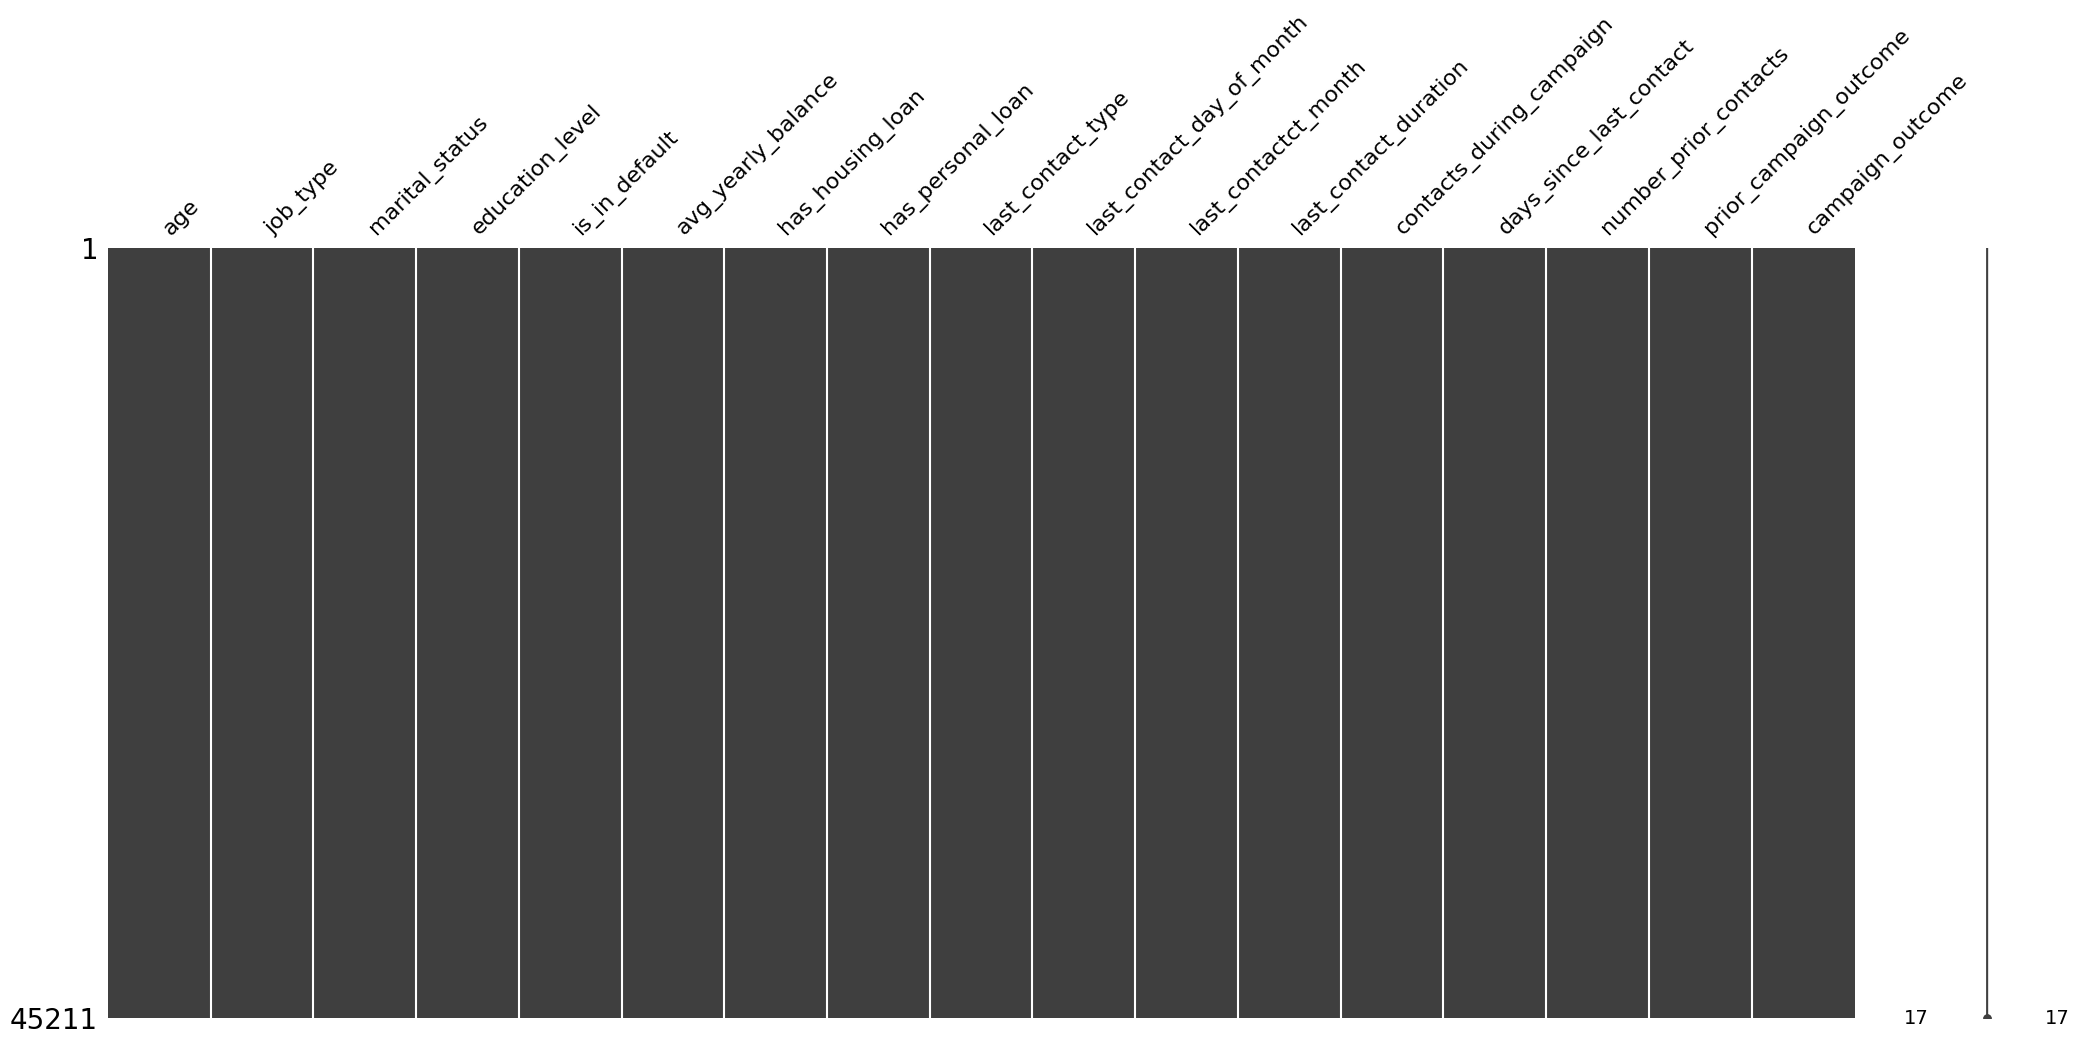

In [21]:
# Importing the libraries
import pandas as pd
import missingno as msno

pandas_df = df.toPandas()

# Visualize missing values as a matrix
msno.matrix(pandas_df)